<a href="https://colab.research.google.com/github/aish7iitkgp/Bioinformatics-Drug-Discovery/blob/main/Drug_Discovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install chembl-webresource-client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 23.1.0
    Uninstalling attrs-23.1.0:
      Successfully uninstalled attrs-23.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jsonschema 4.19.0 requires attrs>=22.2.0, but you have attrs 21.4.0 which is incompatible.
referencing 0.30.2 requires attrs>=22.2.0, but you have attrs 21.4.0 which is incompatible.


In [3]:
import pandas as pd
import numpy as np

from chembl_webresource_client.new_client import new_client

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# target search for Dengue virus

target = new_client.target
target_query = target.search("Dengue virus")
target_df = pd.DataFrame.from_dict(target_query)

target_df

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Dengue virus,Dengue virus,24.0,False,CHEMBL613757,[],ORGANISM,12637
1,[],Dengue virus 1,Dengue virus 1,21.0,False,CHEMBL613360,[],ORGANISM,11053
2,[],Dengue virus 2,Dengue virus 2,21.0,False,CHEMBL613966,[],ORGANISM,11060
3,[],Dengue virus 3,Dengue virus 3,21.0,False,CHEMBL612717,[],ORGANISM,11069
4,[],Dengue virus 4,Dengue virus type 4,18.0,False,CHEMBL613728,[],ORGANISM,11070
...,...,...,...,...,...,...,...,...,...
205,[],Human immunodeficiency virus type 1 (RF/HAT IS...,Human immunodeficiency virus type 1 (RF/HAT IS...,4.0,False,CHEMBL613498,[],ORGANISM,11701
206,"[{'xref_id': 'Q69422', 'xref_name': None, 'xre...",Hepatitis GB virus B,Hepatitis GB virus B NS5B RNA-dependent RNA po...,4.0,False,CHEMBL5981,"[{'accession': 'Q69422', 'component_descriptio...",SINGLE PROTEIN,39113
207,[],Homo sapiens,VEGF-receptor 2 and tyrosine-protein kinase SRC,4.0,False,CHEMBL2111336,"[{'accession': 'P12931', 'component_descriptio...",SELECTIVITY GROUP,9606
208,[],Homo sapiens,Sharpin/RBCK1/RNF31,4.0,False,CHEMBL4296109,"[{'accession': 'Q9H0F6', 'component_descriptio...",PROTEIN COMPLEX,9606


In [7]:
target_df[(target_df['target_type']=='SINGLE PROTEIN') & (target_df['organism']=='Dengue virus')]

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
6,[],Dengue virus,Nonstructural protein 5,14.0,False,CHEMBL4295629,"[{'accession': 'V5TFZ2', 'component_descriptio...",SINGLE PROTEIN,12637


In [8]:
selected_target = target_df.target_chembl_id[6]
selected_target

'CHEMBL4295629'

In [9]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type='IC50')

In [10]:
df = pd.DataFrame.from_dict(res)
df.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,18297472,[],CHEMBL4123978,Inhibition of Dengue virus 4 NS5 full length R...,B,None,None,BAO_0000190,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,None,0.34
1,None,None,18297475,[],CHEMBL4123975,Inhibition of Dengue virus 2 NS5 full length R...,B,None,None,BAO_0000190,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,None,0.36
2,None,None,18297488,[],CHEMBL4123982,Inhibition of Dengue virus RdRp activity using...,B,None,None,BAO_0000190,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,None,5.0
3,None,None,18297489,[],CHEMBL4123982,Inhibition of Dengue virus RdRp activity using...,B,None,None,BAO_0000190,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,None,1.6
4,None,None,18297490,[],CHEMBL4123982,Inhibition of Dengue virus RdRp activity using...,B,None,None,BAO_0000190,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,None,2.0


In [11]:
df.standard_type.unique()

array(['IC50'], dtype=object)

In [12]:
df.to_csv('/content/drive/MyDrive/Intrusion Detection/bioactivity_data_dengue.csv', index=False)

In [13]:
df_clean = df[df['standard_value'].notna()]
df_clean = df_clean[df_clean['canonical_smiles'].notna()]
df_clean.drop_duplicates(['canonical_smiles'], inplace = True)

print(df_clean.shape)
df_clean.head()

(69, 46)


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,18297472,[],CHEMBL4123978,Inhibition of Dengue virus 4 NS5 full length R...,B,None,None,BAO_0000190,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,None,0.34
1,None,None,18297475,[],CHEMBL4123975,Inhibition of Dengue virus 2 NS5 full length R...,B,None,None,BAO_0000190,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,None,0.36
2,None,None,18297488,[],CHEMBL4123982,Inhibition of Dengue virus RdRp activity using...,B,None,None,BAO_0000190,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,None,5.0
3,None,None,18297489,[],CHEMBL4123982,Inhibition of Dengue virus RdRp activity using...,B,None,None,BAO_0000190,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,None,1.6
4,None,None,18297490,[],CHEMBL4123982,Inhibition of Dengue virus RdRp activity using...,B,None,None,BAO_0000190,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,None,2.0


In [14]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df_activity = df_clean[selection]

df_activity.head()

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL4126343,N#C[C@]1(O)C(n2ccc3c(N)ncnc32)O[C@H](COP(=O)(O...,340.0
1,CHEMBL3417270,[N-]=[N+]=N[C@]1(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...,360.0
2,CHEMBL521487,C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP...,5000.0
3,CHEMBL4127092,C#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)...,1600.0
4,CHEMBL4127819,CC#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O...,2000.0


In [15]:
def activity_classifier(sv):

    if float(sv) >= 10000:
        return "inactive"
    elif float(sv) <= 1000:
        return "active"
    else:
        return "intermediate"

In [16]:
df_activity['class'] = df_activity['standard_value'].apply(activity_classifier)

df_activity.head()

<ipython-input-16-67518838ec39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_activity['class'] = df_activity['standard_value'].apply(activity_classifier)


,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL4126343,N#C[C@]1(O)C(n2ccc3c(N)ncnc32)O[C@H](COP(=O)(O...,340.0,active
1,CHEMBL3417270,[N-]=[N+]=N[C@]1(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...,360.0,active
2,CHEMBL521487,C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP...,5000.0,intermediate
3,CHEMBL4127092,C#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)...,1600.0,intermediate
4,CHEMBL4127819,CC#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O...,2000.0,intermediate


In [19]:
df_activity.to_csv("/content/drive/MyDrive/Intrusion Detection/bioactivity_dengue_preprocessed_data.csv", index=False)


In [20]:
!pip install rdkit-pypi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 49.9 MB/s eta 0:00:00


In [21]:
df_proc = pd.read_csv("/content/drive/MyDrive/Intrusion Detection/bioactivity_dengue_preprocessed_data.csv")
df_proc.head()

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL4126343,N#C[C@]1(O)C(n2ccc3c(N)ncnc32)O[C@H](COP(=O)(O...,340.0,active
1,CHEMBL3417270,[N-]=[N+]=N[C@]1(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...,360.0,active
2,CHEMBL521487,C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP...,5000.0,intermediate
3,CHEMBL4127092,C#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)...,1600.0,intermediate
4,CHEMBL4127819,CC#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O...,2000.0,intermediate


##Lipinski's descriptors
The Lipinski's Rule stated the following:

* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

In [22]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [23]:
# calculate descriptors and lipinski values

df_proc['canonical_smiles_mol'] = df_proc['canonical_smiles'].apply(Chem.MolFromSmiles)
df_proc['mol_wt'] = df_proc['canonical_smiles_mol'].apply(Descriptors.MolWt)
df_proc['mol_logp'] = df_proc['canonical_smiles_mol'].apply(Descriptors.MolLogP)
df_proc['num_H_donors'] = df_proc['canonical_smiles_mol'].apply(Lipinski.NumHDonors)
df_proc['num_H_acceptors'] = df_proc['canonical_smiles_mol'].apply(Lipinski.NumHAcceptors)

df_proc.head()

,molecule_chembl_id,canonical_smiles,standard_value,class,canonical_smiles_mol,mol_wt,mol_logp,num_H_donors,num_H_acceptors
0,CHEMBL4126343,N#C[C@]1(O)C(n2ccc3c(N)ncnc32)O[C@H](COP(=O)(O...,340.0,active,<rdkit.Chem.rdchem.Mol object at 0x7cb5fa1392a0>,531.204,-1.13022,7,14
1,CHEMBL3417270,[N-]=[N+]=N[C@]1(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...,360.0,active,<rdkit.Chem.rdchem.Mol object at 0x7cb5fa139310>,524.169,-1.57400,7,14
2,CHEMBL521487,C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP...,5000.0,intermediate,<rdkit.Chem.rdchem.Mol object at 0x7cb5fa139380>,498.167,-2.11080,7,12
3,CHEMBL4127092,C#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)...,1600.0,intermediate,<rdkit.Chem.rdchem.Mol object at 0x7cb5fa1393f0>,508.162,-2.49750,7,12
4,CHEMBL4127819,CC#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O...,2000.0,intermediate,<rdkit.Chem.rdchem.Mol object at 0x7cb5fa139460>,522.189,-2.10740,7,12


In [24]:
def norm(x):
    """
    to limit the standard value to 100  million
    """
    if x > 100000000:
        x = 100000000
    return x

In [25]:
# restricting the standard value by applying the norm function and log10

df_proc['pIC50'] = np.log10(df_proc['standard_value'].apply(norm))
df_proc.head()

,molecule_chembl_id,canonical_smiles,standard_value,class,canonical_smiles_mol,mol_wt,mol_logp,num_H_donors,num_H_acceptors,pIC50
0,CHEMBL4126343,N#C[C@]1(O)C(n2ccc3c(N)ncnc32)O[C@H](COP(=O)(O...,340.0,active,<rdkit.Chem.rdchem.Mol object at 0x7cb5fa1392a0>,531.204,-1.13022,7,14,2.531479
1,CHEMBL3417270,[N-]=[N+]=N[C@]1(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...,360.0,active,<rdkit.Chem.rdchem.Mol object at 0x7cb5fa139310>,524.169,-1.57400,7,14,2.556303
2,CHEMBL521487,C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP...,5000.0,intermediate,<rdkit.Chem.rdchem.Mol object at 0x7cb5fa139380>,498.167,-2.11080,7,12,3.698970
3,CHEMBL4127092,C#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)...,1600.0,intermediate,<rdkit.Chem.rdchem.Mol object at 0x7cb5fa1393f0>,508.162,-2.49750,7,12,3.204120
4,CHEMBL4127819,CC#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O...,2000.0,intermediate,<rdkit.Chem.rdchem.Mol object at 0x7cb5fa139460>,522.189,-2.10740,7,12,3.301030


In [26]:
# getting statistics of pIC50 values

df_proc['pIC50'].describe()

count    69.000000
mean      4.110609
std       1.062035
min       1.204120
25%       3.361728
50%       4.133539
75%       5.146128
max       5.655138
Name: pIC50, dtype: float64

In [27]:
# dropping the intermediate class

df2 = df_proc[df_proc['class'] != 'intermediate']
df2.head()

,molecule_chembl_id,canonical_smiles,standard_value,class,canonical_smiles_mol,mol_wt,mol_logp,num_H_donors,num_H_acceptors,pIC50
0,CHEMBL4126343,N#C[C@]1(O)C(n2ccc3c(N)ncnc32)O[C@H](COP(=O)(O...,340.0,active,<rdkit.Chem.rdchem.Mol object at 0x7cb5fa1392a0>,531.204,-1.13022,7,14,2.531479
1,CHEMBL3417270,[N-]=[N+]=N[C@]1(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...,360.0,active,<rdkit.Chem.rdchem.Mol object at 0x7cb5fa139310>,524.169,-1.57400,7,14,2.556303
5,CHEMBL486231,C[C@@]1(F)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP...,18000.0,inactive,<rdkit.Chem.rdchem.Mol object at 0x7cb5fa1394d0>,500.158,-1.13360,6,11,4.255273
6,CHEMBL4127921,C#C[C@@]1(F)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)...,15900.0,inactive,<rdkit.Chem.rdchem.Mol object at 0x7cb5fa139540>,510.153,-1.52030,6,11,4.201397
7,CHEMBL4129313,CC#C[C@@]1(F)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O...,20000.0,inactive,<rdkit.Chem.rdchem.Mol object at 0x7cb5fa1395b0>,524.180,-1.13020,6,11,4.301030


In [28]:
import seaborn as sns
sns.set(style= 'ticks')
import matplotlib.pyplot as plt
%matplotlib inline

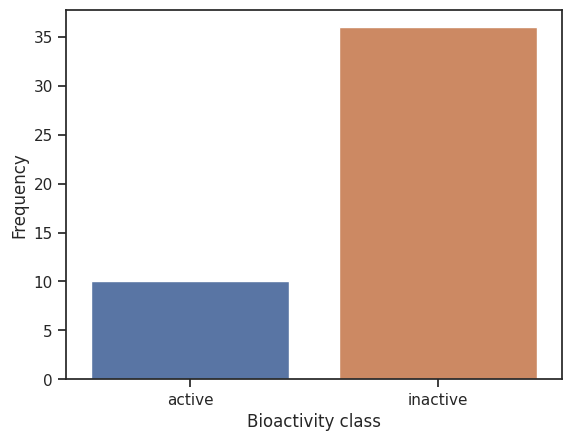

In [29]:
# frequency of Bioactivity class

sns.countplot(x='class', data=df2)

plt.xlabel('Bioactivity class')
plt.ylabel('Frequency')

plt.savefig('plot_bioactivity_class.pdf')

plt.show()

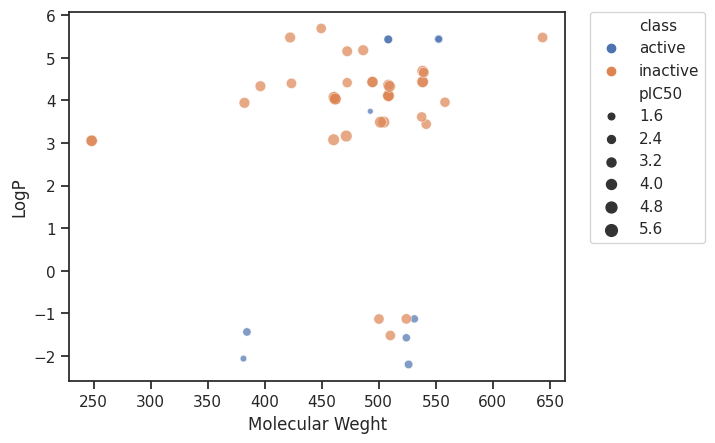

In [30]:
# molecular weight and log of standard P value

sns.scatterplot(x='mol_wt', y='mol_logp', data=df2, hue='class', size='pIC50', alpha = 0.7)

plt.xlabel('Molecular Weght')
plt.ylabel('LogP')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)
plt.savefig('plot_mw_vs_logp.pdf')

plt.show()

### Mann-Whitney U significance test

In [31]:

from numpy.random import seed, randn
from scipy.stats import mannwhitneyu

seed (1)

def whhitney_test(descriptor, verbose=False):

    """
    function to run mann-whitney U test
    """

    selection = [descriptor, 'class']
    df = df2[selection]
    active = df[df['class'] == 'active']
    active = active[descriptor]

    selection = [descriptor, 'class']
    df = df2[selection]
    inactive = df[df['class'] == 'inactive']
    inactive = inactive[descriptor]

    # compare samples
    stat, p = mannwhitneyu(active, inactive)

    # interpretattion
    alpha = 0.05
    if p > alpha:
        inter = "No significant difference"
    else:
        inter = "Distribution significantly different"

    results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':inter}, index=[0])
    filename = 'mannwhitneyu_' + descriptor + '.csv'
    results.to_csv(filename)

    return results

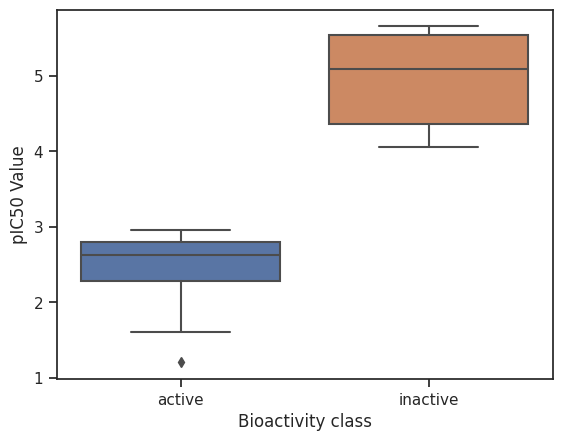

In [32]:
# bioactivity class and pIC50 value

sns.boxplot(x='class', y='pIC50', data=df2)
plt.xlabel('Bioactivity class')
plt.ylabel('pIC50 Value')

plt.savefig('plot_bioactivity_class.pdf')

plt.show()

In [33]:
# whitney test for pIC50
whhitney_test('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,0.000002,0.05,Distribution significantly different


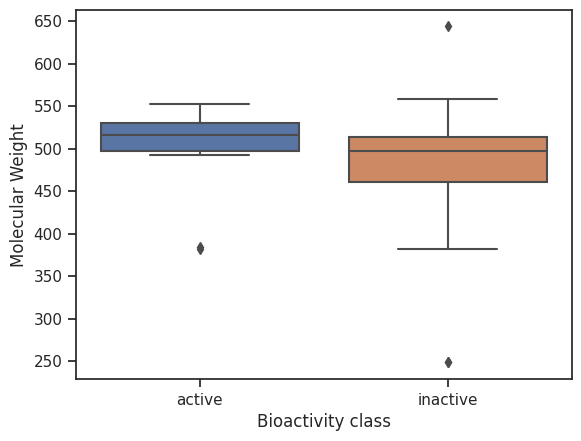

In [34]:
# bioactivity class and molecular weight value

sns.boxplot(x='class', y='mol_wt', data=df2)
plt.xlabel('Bioactivity class')
plt.ylabel('Molecular Weight')

plt.savefig('plot_bioactivity_class.pdf')

plt.show()

In [35]:
# whitney test for pIC50
whhitney_test('mol_wt')

,Descriptor,Statistics,p,alpha,Interpretation
0,mol_wt,214.0,0.372035,0.05,No significant difference


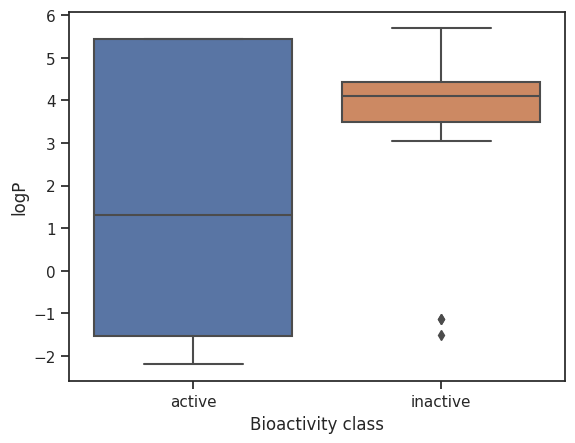

In [36]:
# bioactivity class and log of P value

sns.boxplot(x='class', y='mol_logp', data=df2)
plt.xlabel('Bioactivity class')
plt.ylabel('logP')

plt.savefig('plot_bioactivity_class.pdf')

plt.show()

In [37]:
# whitney test for mol_logP
whhitney_test('mol_logp')

,Descriptor,Statistics,p,alpha,Interpretation
0,mol_logp,146.0,0.372227,0.05,No significant difference


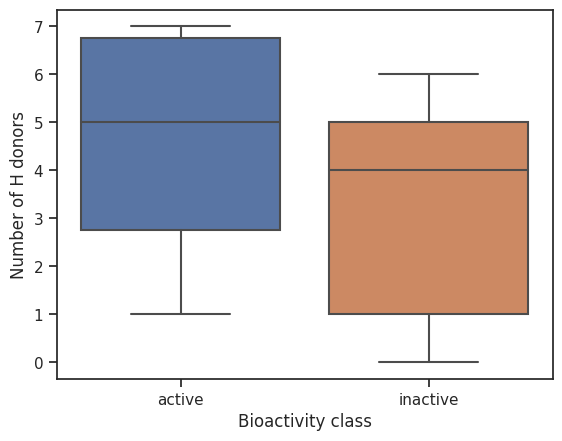

In [38]:
# bioactivity class and num_H_donors

sns.boxplot(x='class', y='num_H_donors', data=df2)
plt.xlabel('Bioactivity class')
plt.ylabel('Number of H donors')

plt.savefig('plot_bioactivity_class.pdf')

plt.show()

In [39]:
# whitney test for num_H_donors
whhitney_test('num_H_donors')

,Descriptor,Statistics,p,alpha,Interpretation
0,num_H_donors,252.5,0.051287,0.05,No significant difference


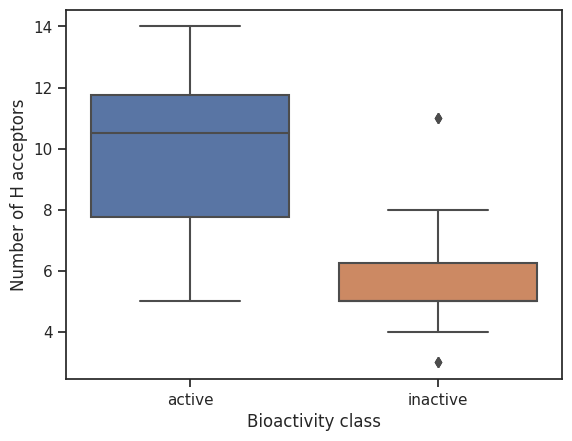

In [40]:
# bioactivity class and num_H_acceptors

sns.boxplot(x='class', y='num_H_acceptors', data=df2)
plt.xlabel('Bioactivity class')
plt.ylabel('Number of H acceptors')

plt.savefig('plot_bioactivity_class.pdf')

plt.show()

In [41]:
# whitney test for number of H acceptors
whhitney_test('num_H_acceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,num_H_acceptors,296.5,0.001519,0.05,Distribution significantly different


### Descriptor Claculations

In [42]:
# Package for Descriptor Calculation

! pip install padelpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 64.0 MB/s eta 0:00:00


In [43]:
df3 = df_proc.copy()

df3.head()

,molecule_chembl_id,canonical_smiles,standard_value,class,canonical_smiles_mol,mol_wt,mol_logp,num_H_donors,num_H_acceptors,pIC50
0,CHEMBL4126343,N#C[C@]1(O)C(n2ccc3c(N)ncnc32)O[C@H](COP(=O)(O...,340.0,active,<rdkit.Chem.rdchem.Mol object at 0x7cb5fa1392a0>,531.204,-1.13022,7,14,2.531479
1,CHEMBL3417270,[N-]=[N+]=N[C@]1(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...,360.0,active,<rdkit.Chem.rdchem.Mol object at 0x7cb5fa139310>,524.169,-1.57400,7,14,2.556303
2,CHEMBL521487,C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP...,5000.0,intermediate,<rdkit.Chem.rdchem.Mol object at 0x7cb5fa139380>,498.167,-2.11080,7,12,3.698970
3,CHEMBL4127092,C#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)...,1600.0,intermediate,<rdkit.Chem.rdchem.Mol object at 0x7cb5fa1393f0>,508.162,-2.49750,7,12,3.204120
4,CHEMBL4127819,CC#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O...,2000.0,intermediate,<rdkit.Chem.rdchem.Mol object at 0x7cb5fa139460>,522.189,-2.10740,7,12,3.301030


In [44]:
selection = ['canonical_smiles', 'molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index = False, header = False)

df3_selection.head()

,canonical_smiles,molecule_chembl_id
0,N#C[C@]1(O)C(n2ccc3c(N)ncnc32)O[C@H](COP(=O)(O...,CHEMBL4126343
1,[N-]=[N+]=N[C@]1(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...,CHEMBL3417270
2,C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP...,CHEMBL521487
3,C#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)...,CHEMBL4127092
4,CC#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O...,CHEMBL4127819


In [45]:
! cat molecule.smi | head -5

N#C[C@]1(O)C(n2ccc3c(N)ncnc32)O[C@H](COP(=O)(O)OP(=O)(O)OP(=O)(O)O)[C@H]1O	CHEMBL4126343
[N-]=[N+]=N[C@]1(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)O[C@@H](n2ccc(N)nc2=O)[C@H](O)[C@@H]1O	CHEMBL3417270
C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP(=O)(O)O)O[C@H]1n1ccc(=O)[nH]c1=O	CHEMBL521487
C#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP(=O)(O)O)O[C@H]1n1ccc(=O)[nH]c1=O	CHEMBL4127092
CC#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP(=O)(O)O)O[C@H]1n1ccc(=O)[nH]c1=O	CHEMBL4127819


In [46]:
! cat molecule.smi | wc -l

69


In [47]:
from padelpy import padeldescriptor

padeldescriptor(mol_dir='/content/molecule.smi', d_file='descriptors.csv',
                fingerprints=True, removesalt=True, detectaromaticity=True,
                log=True, retainorder=True)

In [48]:
df3_padel = pd.read_csv('descriptors.csv')
df3_padel

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL4126343,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL3417270,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL521487,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL4127092,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL4127819,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,CHEMBL5205786,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65,CHEMBL5182967,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66,CHEMBL583412,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,CHEMBL5192551,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df3_padel = df3_padel.drop(columns='Name')
df3_padel.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [50]:
X_1 = df3_padel.copy()
Y_1 = df3['pIC50']
data_xy = pd.concat([X_1, Y_1], axis=1)
data_xy.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2.531479
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2.556303
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.698970
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.204120
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.301030


In [52]:
data_xy.to_csv('/content/drive/MyDrive/Intrusion Detection/data with descriptors padel.csv', index=False)

In [53]:
X = data_xy.drop('pIC50', axis = 1)
Y = data_xy['pIC50']

In [54]:
X.shape

(69, 881)

In [55]:
Y.shape

(69,)

### Model Building

In [56]:
# remove low variance features

from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(0.8*(1-0.8)))
X = selection.fit_transform(X)
X.shape

(69, 175)

In [57]:
# data split into train and test set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [58]:
x_train.shape, y_train.shape

((55, 175), (55,))

In [59]:
x_test.shape, y_test.shape

((14, 175), (14,))

In [60]:
!pip install lazypredict

In [61]:
from lazypredict.Supervised import LazyRegressor

clf = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
train, test = clf.fit(x_train, x_test, y_train, y_test)

100%|██████████| 42/42 [00:15<00:00,  2.66it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 228
[LightGBM] [Info] Number of data points in the train set: 55, number of used features: 76
[LightGBM] [Info] Start training from score 4.004112
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [62]:
train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,50897247650824518703853632888099338834616262477...,-6342580091871978998092490194735764338193936691...,83288177955290782729740286463413995850299245000...,0.22
KernelRidge,2.21,-14.13,4.07,0.07
GaussianProcessRegressor,1.54,-5.72,2.71,0.05
LassoLars,1.10,-0.25,1.17,0.04
Lasso,1.10,-0.25,1.17,0.07
DummyRegressor,1.10,-0.25,1.17,0.06
ElasticNet,1.07,0.14,0.97,0.02
ElasticNetCV,1.04,0.48,0.75,1.95
LGBMRegressor,1.04,0.49,0.75,0.15


In [63]:
test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,50897247650824518703853632888099338834616262477...,-6342580091871978998092490194735764338193936691...,83288177955290782729740286463413995850299245000...,0.22
KernelRidge,2.21,-14.13,4.07,0.07
GaussianProcessRegressor,1.54,-5.72,2.71,0.05
LassoLars,1.10,-0.25,1.17,0.04
Lasso,1.10,-0.25,1.17,0.07
DummyRegressor,1.10,-0.25,1.17,0.06
ElasticNet,1.07,0.14,0.97,0.02
ElasticNetCV,1.04,0.48,0.75,1.95
LGBMRegressor,1.04,0.49,0.75,0.15


In [64]:
from sklearn.linear_model import SGDRegressor

np.random.seed(42)

sgd_model = SGDRegressor(max_iter=1000, tol=1e-3)
sgd_model.fit(x_train, y_train)

s1 = sgd_model.score(x_test, y_test)
s1

0.7088547949904473

In [67]:
y_pred = sgd_model.predict(x_test)

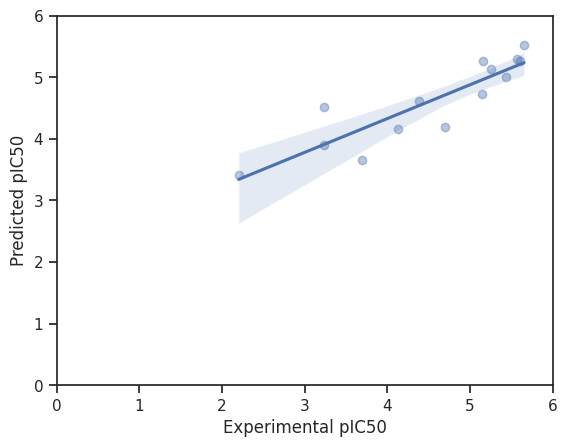

In [69]:
# plotting predicted vs actual data

ax = sns.regplot(data=data_xy,x=y_test,y= y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50')
ax.set_ylabel('Predicted pIC50')
ax.set_xlim(0, 6)
ax.set_ylim(0, 6)

plt.show()